<a href="https://colab.research.google.com/github/PhantomBlade009/ISLR_LinReg_Solutions/blob/main/Chap4_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
import numpy as np 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/mscaudill/IntroStatLearn/master/data/Smarket.csv')
df.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [7]:
df.drop(columns=df.columns[0], inplace=True)
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


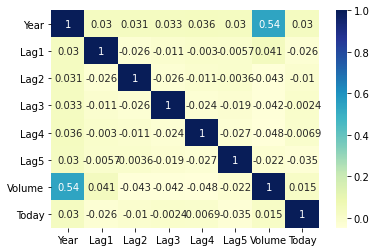

In [8]:
corr = df.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True)

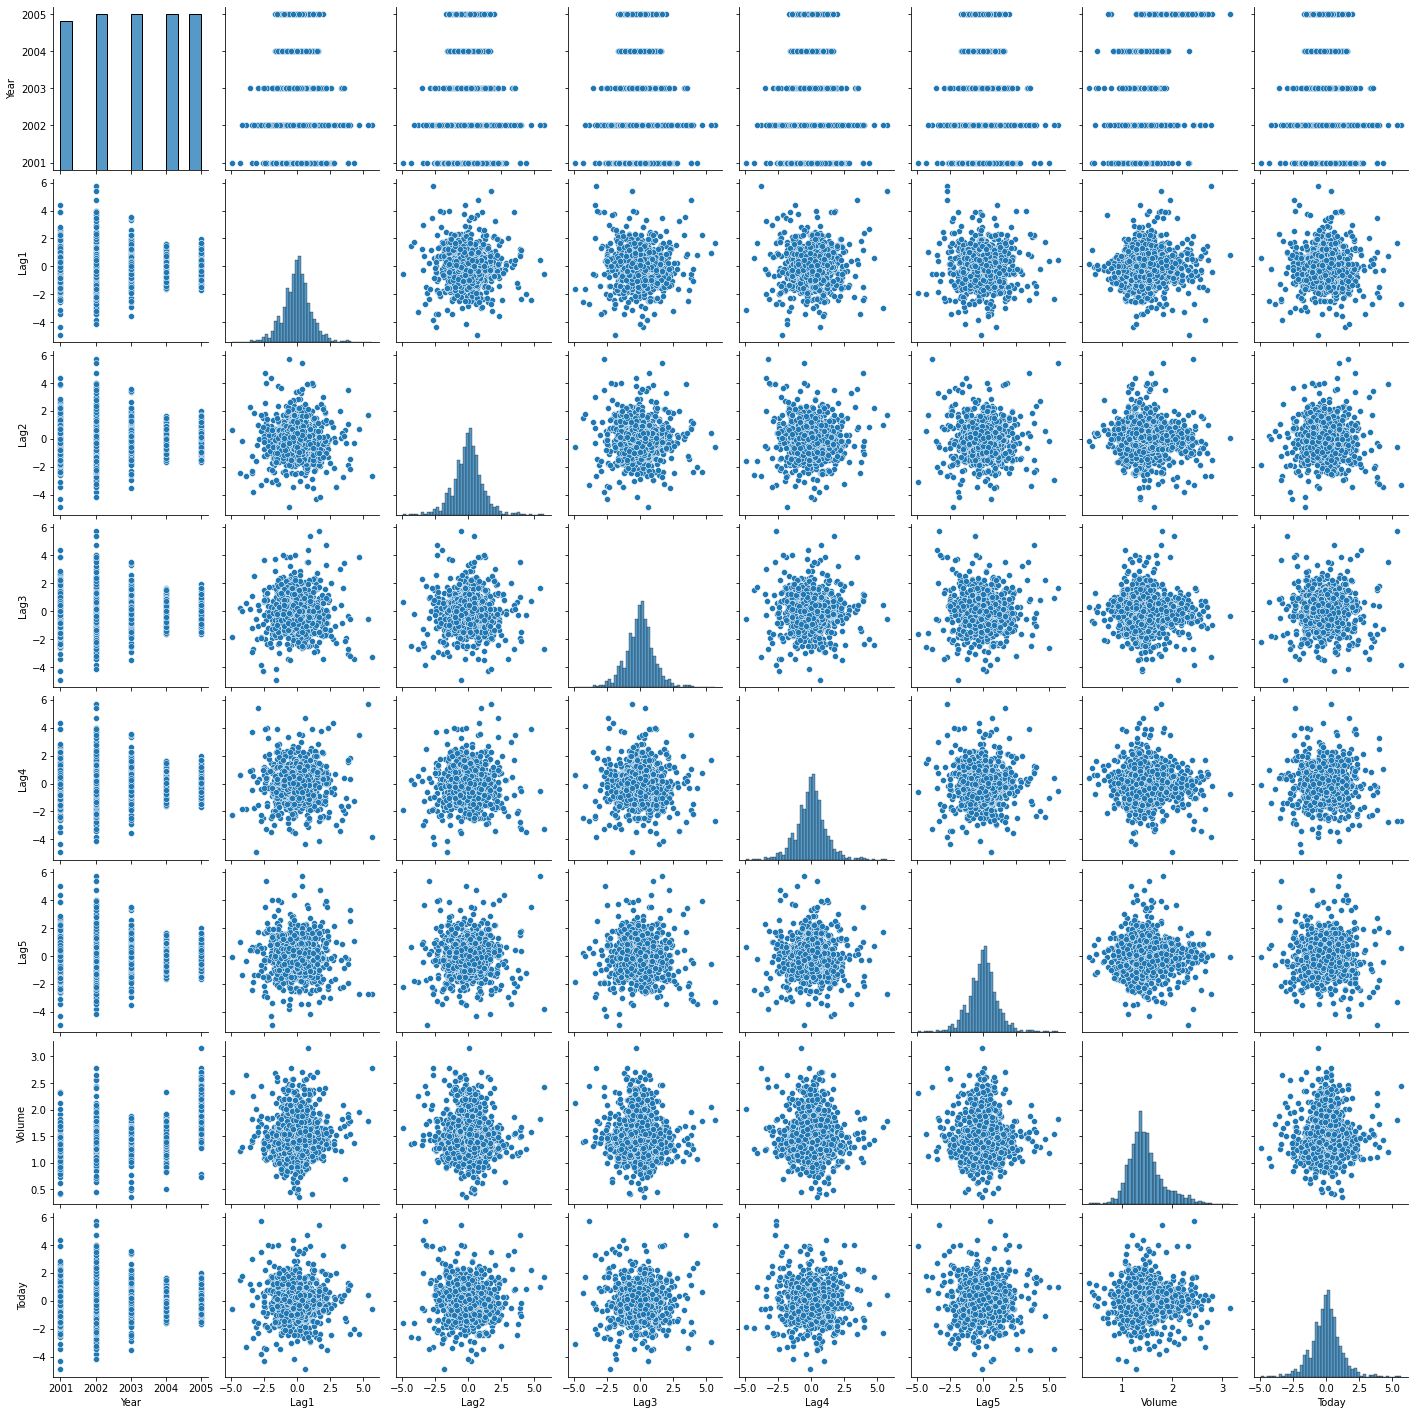

In [16]:
sns.pairplot(df)

In [8]:
df.isnull().mean()

Year         0.0
Lag1         0.0
Lag2         0.0
Lag3         0.0
Lag4         0.0
Lag5         0.0
Volume       0.0
Today        0.0
Direction    0.0
dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
y = encoder.fit_transform(df['Direction'])
X = df.iloc[:,1:df.shape[1]-2].values
print(X.shape, y.shape)

(1250, 6) (1250,)


In [11]:
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
Xprime = sm.add_constant(X)
model = sm.GLM(y, Xprime, family = sm.families.Binomial()).fit() 
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Wed, 28 Apr 2021   Deviance:                       1727.6
Time:                        12:09:56   Pearson chi2:                 1.25e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.6

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
logr = LogisticRegression()

In [14]:
logr.fit(X,y)
y_predict = logr.predict(X)

Classification Report : 
              precision    recall  f1-score   support

           0       0.51      0.24      0.32       602
           1       0.53      0.78      0.63       648

    accuracy                           0.52      1250
   macro avg       0.52      0.51      0.48      1250
weighted avg       0.52      0.52      0.48      1250

[[144 458]
 [141 507]]


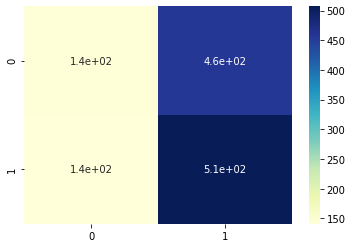

In [15]:
print('Classification Report : ')
print(classification_report(y, y_predict))
conf = confusion_matrix(y, y_predict, )
sns.heatmap(conf, cmap='YlGnBu', annot=True) 
print(conf)

In [16]:
# Using 2005 as test

In [17]:
Xtrain = df[df.Year != 2005].iloc[:, 1:7].values
ytrain = df[df.Year != 2005].Direction 
ytrain = encoder.fit_transform(ytrain)
Xtest = df[df.Year == 2005].iloc[:, 1:7].values
ytest = df[df.Year == 2005].Direction 
ytest = encoder.fit_transform(ytest)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(998, 6) (998,) (252, 6) (252,)


Classification Report : 
              precision    recall  f1-score   support

           0       0.44      0.67      0.53       111
           1       0.56      0.34      0.42       141

    accuracy                           0.48       252
   macro avg       0.50      0.50      0.48       252
weighted avg       0.51      0.48      0.47       252



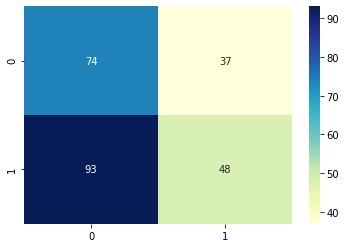

In [18]:
logr.fit(Xtrain,ytrain) 
ytest_predict = logr.predict(Xtest) 
print('Classification Report : ') 
print(classification_report(ytest, ytest_predict)) 
conf = confusion_matrix(ytest, ytest_predict, )
sns.heatmap(conf, cmap = 'YlGnBu', annot = True)

In [19]:
# Using Lag1 and Lag2 only 

In [20]:
Xtrain_1 = Xtrain[:, 0:2]
Xtest_1 = Xtest[:, 0:2]
print(Xtrain.shape, Xtest.shape)

(998, 6) (252, 6)


              precision    recall  f1-score   support

           0       0.50      0.32      0.39       111
           1       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



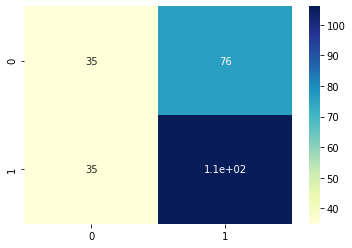

In [21]:
logr.fit(Xtrain_1, ytrain)
ytest_1_predict = logr.predict(Xtest_1) 
print(classification_report(ytest, ytest_1_predict))
conf = confusion_matrix(ytest, ytest_1_predict) 
sns.heatmap(conf, cmap = 'YlGnBu', annot=True)

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.50      0.32      0.39       111
           1       0.58      0.75      0.66       141

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252

Coefficients =  [[-0.05544078 -0.0443452 ]]
Priors :  [0.49198397 0.50801603]
Group Means :  [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


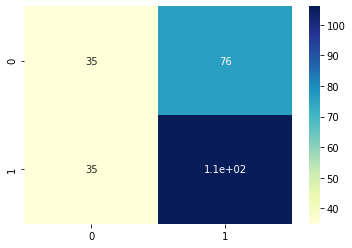

In [23]:
lda.fit( Xtrain_1, ytrain)
ytest_1_predict = lda.predict(Xtest_1) 
print(classification_report(ytest, ytest_1_predict))
conf = confusion_matrix(ytest, ytest_1_predict) 
sns.heatmap(conf, cmap='YlGnBu', annot = True) 
probs = lda.predict_proba(Xtest_1)
print('Coefficients = ', lda.coef_)
print('Priors : ', lda.priors_)
print('Group Means : ', lda.means_)

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.60      0.27      0.37       111
           1       0.60      0.86      0.71       141

    accuracy                           0.60       252
   macro avg       0.60      0.56      0.54       252
weighted avg       0.60      0.60      0.56       252

Priors :  [0.49198397 0.50801603]
Group Means :  [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


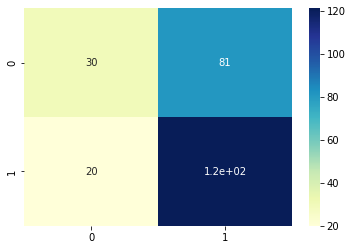

In [25]:
qda.fit( Xtrain_1, ytrain)
ytest_1_predict = qda.predict(Xtest_1) 
print(classification_report(ytest, ytest_1_predict))
conf = confusion_matrix(ytest, ytest_1_predict) 
sns.heatmap(conf, cmap='YlGnBu', annot = True) 
probs = qda.predict_proba(Xtest_1)
print('Priors : ', qda.priors_)
print('Group Means : ', qda.means_)

In [26]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)

              precision    recall  f1-score   support

           0       0.40      0.36      0.38       111
           1       0.54      0.58      0.56       141

    accuracy                           0.48       252
   macro avg       0.47      0.47      0.47       252
weighted avg       0.48      0.48      0.48       252



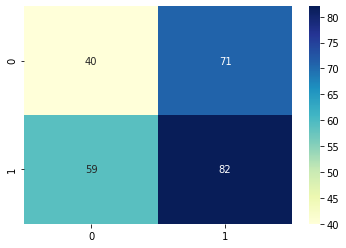

In [27]:
knn.fit(Xtrain_1, ytrain)
ytest_1_predict = knn.predict(Xtest_1) 
print(classification_report(ytest, ytest_1_predict))
conf = confusion_matrix(ytest, ytest_1_predict)
sns.heatmap(conf, cmap = 'YlGnBu', annot=True) 


## Caravan Dataset

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/mscaudill/IntroStatLearn/master/data/Caravan.csv')
df.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


In [31]:
df.drop(columns = df.columns[0], inplace =True)

In [32]:
df.shape

(5822, 86)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:, 0: 85] 
Xnorm = scaler.fit_transform(X)
y = df.iloc[:, -1] 
print(X.shape, y.shape)

(5822, 85) (5822,)


In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xnorm,y, test_size=0.33)

In [44]:
for i in {1,3,5}:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(Xtrain, ytrain)
  y_predict = knn.predict(Xtest) 
  print(classification_report(ytest, y_predict))
  conf = confusion_matrix(ytest, y_predict)
  print(conf)
  print('____________________________________')


              precision    recall  f1-score   support

          No       0.95      0.94      0.94      1809
         Yes       0.12      0.13      0.13       113

    accuracy                           0.89      1922
   macro avg       0.53      0.54      0.54      1922
weighted avg       0.90      0.89      0.90      1922

[[1702  107]
 [  98   15]]
____________________________________
              precision    recall  f1-score   support

          No       0.94      0.98      0.96      1809
         Yes       0.11      0.04      0.05       113

    accuracy                           0.93      1922
   macro avg       0.53      0.51      0.51      1922
weighted avg       0.89      0.93      0.91      1922

[[1778   31]
 [ 109    4]]
____________________________________
              precision    recall  f1-score   support

          No       0.94      1.00      0.97      1809
         Yes       0.18      0.02      0.03       113

    accuracy                           0.94      1922
